# **Formação Cientista de Dados**
## Séries temporais

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Carregamento da base de dados
base = pd.read_csv('./Data/AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Visualizando o tamanho
base.shape

(144, 2)

In [4]:
# Visualização do tipo de dados dos atributos
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [5]:
"""
Conversão dos atributos que estão no formato string para formato de data: 
ANO-MÊS
"""
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv(
    './Data/AirPassengers.csv', parse_dates=['Month'], index_col='Month',
    date_format=dataparse
)
base

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [6]:
# Visualização do índice do dataframe (#Passengers) 
base.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [7]:
#criação da série temporal (ts)
ts = base['#Passengers']
ts

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: #Passengers, Length: 144, dtype: int64

In [8]:
# Visualização por ano e mês
ts['1949-02']

118

In [9]:
# Visualização de intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-02    126
1950-03    141
1950-04    135
1950-05    125
1950-06    149
1950-07    170
Name: #Passengers, dtype: int64

In [10]:
# Visualização de intervalos sem preencher a data de início
ts[:'1950-07-31']

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
1949-06    135
1949-07    148
1949-08    148
1949-09    136
1949-10    119
1949-11    104
1949-12    118
1950-01    115
1950-02    126
1950-03    141
1950-04    135
1950-05    125
1950-06    149
1950-07    170
Name: #Passengers, dtype: int64

In [11]:
# Valores máximos 
ts.index.max()

'1960-12'

In [12]:
# mínimos
ts.index.min()

'1949-01'

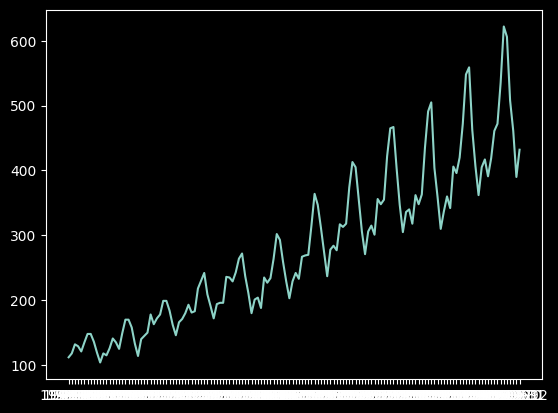

In [13]:
# Visualização da série temporal completa
plt.plot(ts);

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: YE-DEC, Name: #Passengers, dtype: int64

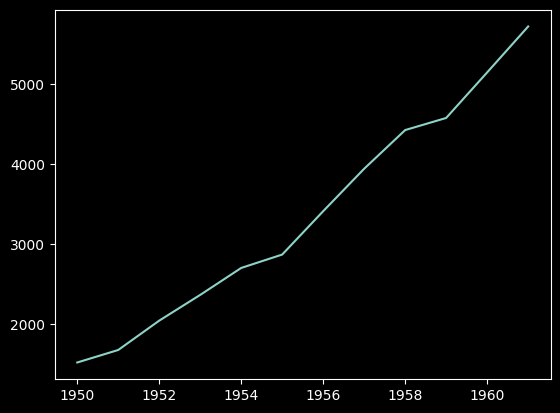

In [14]:
# Visualização por ano
ts.index = pd.to_datetime(ts.index)
ts_ano = ts.resample('YE').sum()
plt.plot(ts_ano);
ts_ano

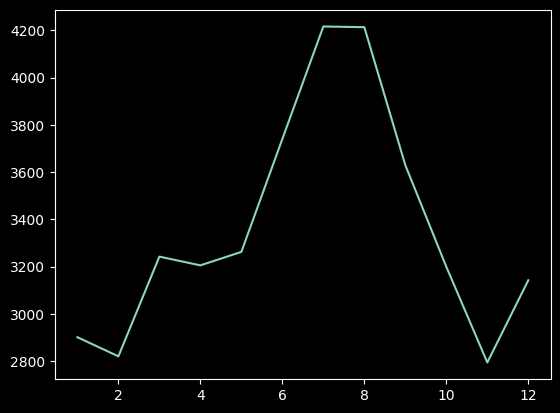

In [15]:
# Visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes);

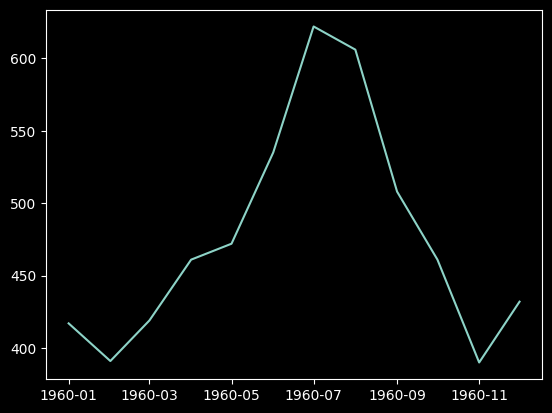

In [16]:
# Visualização entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas);